# Project Orange: IMDB reviews sentiment analysis

The purpose of the project is to build a model that would be able to classify the sentiment of a review of a movie and label if it has a positive or a negative sentiment. This way the opinions could be classified to be either negative or positive, while the medium sentiment is excluded from the analysis. 
Thus, the goal is to assign and weight either a positive or a negative connotation associated with each word or group of words. In addition, no weight is intended to be assigned to the words that are commonly used is sentence formation and that do not reflect any emotion. 

## Setup

Run the data_cleaning notebook tho have access to all its contents in this shell

In [32]:
%run 1_data_cleaning.ipynb

Requirement already up-to-date: scikit-learn in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (0.22)
Requirement already up-to-date: spacy in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (2.2.3)
Requirement already up-to-date: pandas in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (0.25.3)
Requirement already up-to-date: seaborn in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (0.9.0)
Requirement already up-to-date: sklearn in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (0.0)
Requirement already up-to-date: nltk in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (3.4.5)
Requirement already up-to-date: jupyter in /Users/sylvain/anaconda3/envs/optimize/lib/python3.7/site-packages (1.0.0)


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


[nltk_data] Downloading package words to /Users/sylvain/nltk_data...
[nltk_data]   Package words is already up-to-date!


# 1. EDA

### Import dataset

In [7]:
data = pd.read_csv("../data/very_clean_dataset.csv") 

# Keep the first 100 elements to reduce the load on cpu
#data=data[:50]
data.head()

,review,sentiment,mastacleaned_reviews
0,reviewer mention watch oz episode hook right e...,positive,reviewer mention watch episode hook right exac...
1,wonderful little production filming technique ...,positive,wonderful little production technique very ver...
2,think wonderful way spend time hot sit air con...,positive,think wonderful way spend time hot sit air con...
3,basically family little boy jake think zombie ...,negative,basically family little boy jake think zombie ...
4,petter love time money visually stunning film ...,positive,petter love time money visually stunning film ...


In [8]:
# Base rate, delete later
a=data[data["sentiment"]=="positive"].shape
b=data[data["sentiment"]=="negative"].shape
base_rate=max(a[0], b[0])/data.shape[0]
print("The base rate is "+ str(base_rate))

The base rate is 0.54


# 2. Analysis

#### Splitting the dataset into training and test sets

In [9]:
X = data['mastacleaned_reviews'] # the features we want to analyze, we can play with others too
y = data['sentiment'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

### 2.1 Logistic Model

In [11]:
classifier = LogisticRegression(solver="lbfgs")

count_vector = CountVectorizer(tokenizer = tokenize_review, ngram_range = (1,2))

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', count_vector), ('classifier', classifier)])

# Fit Model
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize_review at 0x12abdc598>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
            

#### Strongest Coefficients

In [12]:
count_vector.get_feature_names()[:100]

['able',
 'able stand',
 'absolutely',
 'absolutely brilliantly',
 'absorb',
 'absorb audience',
 'abstract',
 'abstract absurd',
 'absurd',
 'absurd dance',
 'absurd nature',
 'accent',
 'accent effective',
 'accept',
 'accept consequence',
 'accept look',
 'accomplish',
 'accomplish nothing',
 'accomplish think',
 'account',
 'account tell',
 'account true',
 'accurate',
 'accurate fact',
 'accurate meld',
 'accurate true',
 'accustomed',
 'accustomed high',
 'achieve',
 'achieve desire',
 'achieve human',
 'achingly',
 'achingly tedious',
 'act',
 'act horse',
 'act movie',
 'act skill',
 'act willing',
 'acting',
 'acting b',
 'acting expectation',
 'acting film',
 'acting hard',
 'acting negatively',
 'acting talent',
 'acting think',
 'acting top',
 'action',
 'action crime',
 'action like',
 'action sequence',
 'actor',
 'actor brit',
 'actor certainly',
 'actor extremely',
 'actor film',
 'actor good',
 'actor mix',
 'actor not',
 'actor paper',
 'actor story',
 'actor talk',
 

#### Results

In [13]:
predicted_train = pipe.predict(X_train)
predicted_test = pipe.predict(X_test)

# train accuracy
print("Train set accuracy: " + str(pipe.score(X_train, y_train)))
# test accuracy
print("Test set accuracy is: " + str(pipe.score(X_test, y_test)))
print("Train set precision: " + str(metrics.precision_score(y_train, predicted_train, pos_label="positive")))
print("Train set recall: " +  str(metrics.recall_score(y_train, predicted_train, pos_label="positive")))
print("Test set precision: " + str(metrics.precision_score(y_test, predicted_test, pos_label="positive")))
print("Test set recall: " + str(metrics.recall_score(y_test, predicted_test, pos_label="positive")))

Train set accuracy: 1.0
Test set accuracy is: 0.5
Train set precision: 1.0
Train set recall: 1.0
Test set precision: 1.0
Test set recall: 0.16666666666666666


#### Confusion matrix

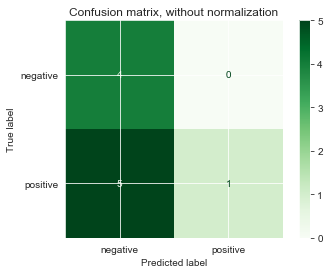

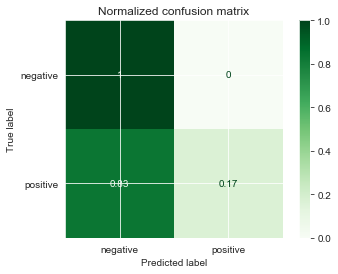

In [14]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Greens, normalize=normalize)
    disp.ax_.set_title(title)

#### Precision Recall Curve


Average precision-recall score: 0.83


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

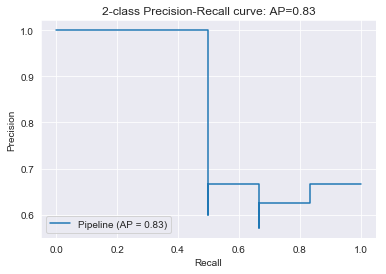

In [15]:
y_score = pipe.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score, pos_label="positive")

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(pipe, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### 2.2 Decision Trees

In [16]:
X = count_vector.fit_transform(data['review'])
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [17]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
tree.score(X_test,y_test)

0.6

In [19]:
tree.get_depth()

2

#### Tuning the depth of the tree

In [20]:
scores = []
for d in range(1, 21):
    test_tree = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    test_tree.fit(X_train, y_train)
    scores.append(test_tree.score(X_test, y_test))

Text(0.5, 0, 'depth')

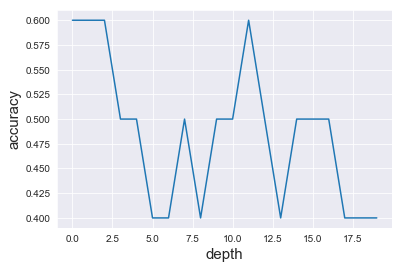

In [21]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [22]:
np.argmax(scores)

0

#### Confusion matrix

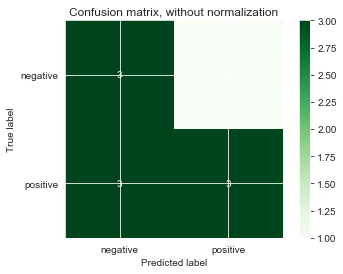

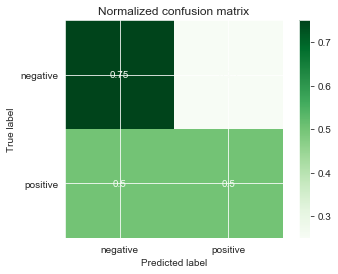

In [23]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Greens, normalize=normalize)
    disp.ax_.set_title(title)

 We need to have: 
* Precision & Recall for all methods 
* Precision-Recall curve 
* Cross-validation for all methods 


###  2.3 KNN Classification

In [25]:
knn = KNeighborsClassifier(n_neighbors= 10, weights='uniform') #here we can change the K-neighbors

In [26]:
X = count_vector.fit_transform(data['review'])
y = data['sentiment']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [29]:
knn.score(X_test, y_test)

0.4

#### Confusion matrix

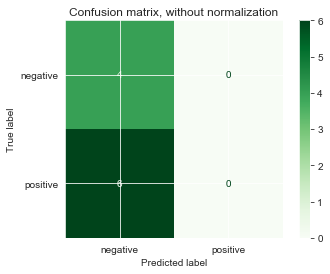

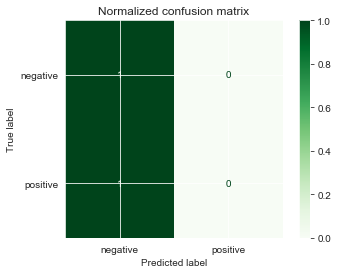

In [30]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Greens, normalize=normalize)
    disp.ax_.set_title(title)

### 3.4 Text similarity

In [31]:
stopwords = spacy_stopwords

# using default tokenizer 
count = CountVectorizer(ngram_range=(1,2), stop_words = None)
bow = count.fit_transform(data)

# 4. Conclusion and Recommendation

From the analysis shown above we can see that the best performing method of classification of the reviews into binary class positive/negative is Logistic Regression method......